# FORMULACIÓN DEL MODELO DE OPTIMIZACIÓN

La formulación del modelo se basa en la representación matemática de las relaciones entre actores de la red planteada. Para esto se formula un algoritmos de programación lineal de enteros mixtos (MILP) que contemple el problema de asignación de cantidad optima de cada tipo de queso y operación de agentes dentro de la red, para llegar a la modelación definitiva se lleva a cabo las distintas pruebas de funcionalidad con el fin de validad cada una de las restricciones, supuestos y variables de salida, con el fin de verificar la validez de los resultados. 

## Modelo de optimización

### 1. Importa la librería 

In [16]:
# Instalando biblioteca pyomo y GLPK
# Instalando Pyomo
# pip3 install pyomo
# pip3 install pandas

In [17]:

import pandas as pd
from pyomo.environ import*
import pyomo.environ as pyo

### 2. Crea un modelo de Pyomo 

In [18]:
# Crear un modelo abstracto con Pyomo
modelo = pyo.AbstractModel()

### 3. Cargamos los parametros

In [19]:
# Cargar datos desde archivos CSV
# Asumiendo que tienes archivos CSV llamados 'costo_produccion.csv', 'costo_fijo_acopio.csv', etc.
# Ajusta los nombres de archivos según tus necesidades

productores_df = pd.read_csv('Productores.csv', index_col='Productores')
centros_de_acopios_df = pd.read_csv('CAcopios.csv', index_col='CAcopios')
clientes_df = pd.read_csv('Clientes.csv', index_col='Clientes')
productos_df = pd.read_csv('Productos.csv', index_col='Productos')
periodo_de_tiempo_df = pd.read_csv('Tiempo.csv', index_col='Tiempo')

costo_produccion_df = pd.read_csv('CostoProduccion.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_fijo_acopio_df = pd.read_csv('CostoFijoAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_var_acopio_df = pd.read_csv('CostoVarAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_inv_acopio_df = pd.read_csv('CostoInvAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_trans_prod_acopio_df = pd.read_csv('CostoTransProdAcopio.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
costo_trans_acopio_clie_df = pd.read_csv('CostoTransAcopioClie.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
demanda_clie_df = pd.read_csv('DemandaClie.csv', delimiter=';', decimal=',', encoding='utf-8-sig') 
cap_productor_df = pd.read_csv('CapProductor.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
cap_almacenamientoCA_df = pd.read_csv('CapAlmacenamientoCA.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  
productos_dinsatisfecha_df = pd.read_csv('PDinsatisfecha.csv', delimiter=';', decimal=',', encoding='utf-8-sig')  

# Convertir los DataFrames a diccionarios
costo_produccion_dict = {(row['Productos'], row['Productores'], row['Tiempo']): row['CostoProduccion'] for _, row in costo_produccion_df.iterrows()}
costo_fijo_acopio_dict = {(row['CAcopios'], row['Tiempo']): row['CostoFijoAcopio'] for _, row in costo_fijo_acopio_df.iterrows()}
costo_var_acopio_dict = {(row['Productos'], row['CAcopios'], row['Tiempo']): row['CostoVarAcopio'] for _, row in costo_var_acopio_df.iterrows()}
costo_inv_acopio_dict = {(row['Productos'], row['CAcopios'], row['Tiempo']): row['CostoInvAcopio'] for _, row in costo_inv_acopio_df.iterrows()}
costo_trans_prod_acopio_dict = {(row['Productos'], row['Productores'], row['CAcopios'], row['Tiempo']): row['CostoTransProdAcopio'] for _, row in costo_trans_prod_acopio_df.iterrows()}
costo_trans_acopio_clie_dict = {(row['Productos'], row['Productores'], row['Clientes'], row['Tiempo']): row['CostoTransAcopioClie'] for _, row in costo_trans_acopio_clie_df.iterrows()}
demanda_clie_dict = {(row['Productos'], row['Clientes'], row['Tiempo']): row['DemandaClie']  for _, row in demanda_clie_df.iterrows()}
cap_productor_dict = {(row['Productos'], row['Productores'], row['Tiempo']): row['CapProductor']  for _, row in cap_productor_df.iterrows()}
cap_almacenamientoCA_dict = {(row['Productos'], row['CAcopios'], row['Tiempo']): row['CapAlmacenamientoCA']  for _, row in cap_almacenamientoCA_df.iterrows()}
productos_dinsatisfecha_dict = {(row['Productos'], row['Tiempo']): row['PDinsatisfecha']  for _, row in productos_dinsatisfecha_df.iterrows()}


In [20]:
# Antes de la creación de los conjuntos, agrega estas líneas
print("Claves de los conjuntos:")
print("Productores:", productores_df.index)
print("Centros de acopios:", centros_de_acopios_df.index)
print("Clientes:", clientes_df.index)
print("Productos:", productos_df.index)
print("Periodo de tiempo:", periodo_de_tiempo_df.index)

# Luego de la creación de los diccionarios, agrega estas líneas
print("\nClaves de los diccionarios:")
print("CostoProduccion:", costo_produccion_dict.keys())
print("CostoFijoAcopio:", costo_fijo_acopio_dict.keys())
print("CostoVarAcopio:", costo_var_acopio_dict.keys())
print("CostoInvAcopio:", costo_inv_acopio_dict.keys())
print("CostoTransProdAcopio:", costo_trans_prod_acopio_dict.keys())
print("CostoTransAcopioClie:", costo_trans_acopio_clie_dict.keys())
print("DemandaClie:", demanda_clie_dict.keys())
print("CapProductor:", cap_productor_dict.keys())
print("CapAlmacenamientoCA:", cap_almacenamientoCA_dict.keys())

Claves de los conjuntos:
Productores: Index(['LUIS GALVIS NAVARRO', 'NATALIA VILLA', 'JULIA MEZA GARAY',
       'CELEN PEREZ', 'JAIDER DARIO TOLOOZA DAZA', 'ASTRID ARTEAGA GARRIDO',
       'OCTAVIO JARA', 'JAIME ARANGO', 'JUAN FELIPE JURMAY',
       'LUZ ESTELA FERNANDEZ DIAZ', 'KELLY RESTREPO PEREZ',
       'JAVIER DAVID OSPINO MOJICA', 'LAUL ESPINOSA', 'JUAN DIAZ',
       'LEANDRO MANUEL MUÑOZ MORALES', 'JAVIER BERNAL', 'MANUEL ESPAÑA DIAZ',
       'SEBASTIAN BOTERO', 'JANER TORRES', 'JHONNY MANUEL VISBAL NIETO',
       'LUIS ALBERTO TREJO DE ANGEL', 'JHON JAIRO VERGARA', 'IVAN RADA',
       'ARTURO CARBACHO'],
      dtype='object', name='Productores')
Centros de acopios: Index(['GUAMAL', 'PIVIJAY', 'NUEVA GRANADA'], dtype='object', name='CAcopios')
Clientes: Index(['Cliente 1'], dtype='object', name='Clientes')
Productos: Index(['Queso duro', 'Queso blando'], dtype='object', name='Productos')
Periodo de tiempo: Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Tiem

### 4. Conjuntos

| Término | Descripción                    |
|---------|--------------------------------|
| I       | Conjunto de productores        |
| J       | Conjunto de centros de acopio  |
| K       | Conjunto de clientes           |
| P       | Conjunto de productos          |
| T       | Conjunto de periodos de tiempo |


In [21]:

modelo.productores = pyo.Set(initialize=productores_df.index)  # Conjunto I de productores
modelo.centros_de_acopios = pyo.Set(initialize=centros_de_acopios_df.index)  # Conjunto J de centros de acopio
modelo.clientes = pyo.Set(initialize=clientes_df.index)  # Conjunto K de clientes
modelo.productos = pyo.Set(initialize=productos_df.index)  # Conjunto P de productos
modelo.periodo_de_tiempo = pyo.Set(initialize=periodo_de_tiempo_df.index)  # Conjunto T de periodos de tiempo

### 5. Parámetros 

| Término                       | Descripción                                                                       | Unidades    |
|-------------------------------|-----------------------------------------------------------------------------------|-------------|
| Costos de producción          |                                                                               |             |
| $CostoProducción_{pit}$        | Costo de producción del producto p en el productor i en el periodo de tiempo t    | [$/kg]      |
| Costos de operación           |                                                                               |             |
| $CostoFijoAcopi_{jt}$         | Costo fijo del centro de acopio j en el periodo de tiempo t                        | [$]         |
| $CostoVarAcopio_{pjt}$         | Costo variable del producto p en el centro de acopio j en el periodo de tiempo t  | [$/kg]      |
| Costos de inventario          |                                                                               |             |
| $CostoInvAcopio_{pjt}$         | Costo de inventario del producto p en el centro de acopio j en el periodo de tiempo t | [$/kg]   |
| Costos de transporte          |                                                                               |             |
| $CostoTransProdAcopi_{pijt}$  | Costo de transporte del producto p desde el productor i hasta el centro de acopio j en el periodo de tiempo t | [$/kg] |
| $CostoTransAcopioClie_{pjkt}$  | Costo de transporte del producto p desde el centro de acopio j hasta el cliente k en el periodo de tiempo t | [$/kg] |
| Demanda                       |                                                                               |             |
| $DemandaClie_{pkt}$            | Demanda del producto p en el cliente k en el periodo de tiempo t                  | [kg]        |
| Capacidades                   |                                                                               |             |
| $CapProductor_{pit}$           | Capacidad de suministro del producto p en el productor i en el periodo de tiempo t | [kg]        |
| $CapAlmacenamientoCA_{pjt}$    | Capacidad de almacenamiento del producto p en el centro de acopio j en el periodo de tiempo t | [kg]   |
| $PDinsatisfecha_{pt}$          | Costo de la demanda insatisfecha del producto p en el periodo de tiempo t         | [$/kg]      |


In [22]:

modelo.CostoProduccion = pyo.Param(modelo.productos, modelo.productores, modelo.periodo_de_tiempo, initialize = costo_produccion_dict)
modelo.CostoFijoAcopio = pyo.Param(modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_fijo_acopio_dict)
modelo.CostoVarAcopio = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_var_acopio_dict)
modelo.CostoInvAcopio = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_inv_acopio_dict)
modelo.CostoTransProdAcopio = pyo.Param(modelo.productos, modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = costo_trans_prod_acopio_dict)
modelo.CostoTransAcopioClie = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.clientes, modelo.periodo_de_tiempo, initialize = costo_trans_acopio_clie_dict)
modelo.DemandaClie = pyo.Param(modelo.productos, modelo.clientes, modelo.periodo_de_tiempo, initialize = demanda_clie_dict)
modelo.CapProductor = pyo.Param(modelo.productos, modelo.productores, modelo.periodo_de_tiempo, initialize = cap_productor_dict)
modelo.CapAlmacenamientoCA = pyo.Param(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, initialize = cap_almacenamientoCA_dict)
modelo.PDinsatisfecha = pyo.Param(modelo.productos, modelo.periodo_de_tiempo, initialize = productos_dinsatisfecha_dict)

### 6. Variables de decisión 

| Término                 | Descripción                                                                       | Unidades  |
|-------------------------|-----------------------------------------------------------------------------------|-----------|
| Variables de operación  |                                                                               |           |
| $CA_{jt}$               | 1 si se opera un centro de acopio j en el periodo de tiempo t; 0 en caso contrario | [binaria] |
| $AS_{ijt}$              | 1 si se asigna un envío de i a j en el periodo de tiempo t; 0 en caso contrario   | [binaria] |
| Variables de flujo      |                                                                               |           |
| $PA_{pijt}$             | Cantidad del producto p por enviar desde el productor i hasta el centro de acopio j en el periodo de tiempo t | [kg]      |
| $AC_{pjkt}$             | Cantidad del producto p por enviar desde el centro de acopio j al cliente k en el periodo de tiempo t       | [kg]      |
| Variables de inventario |                                                                               |           |
| $InvCA_{pjt}$           | Inventario del producto p en el centro de acopio j en el periodo de tiempo t     | [kg]      |
| Variables demanda insatisfecha |                                                      |           |
| $DInsatisfecha_{pt}$    | Demanda insatisfecha del producto p en el periodo de tiempo t                    | [kg]      |



In [23]:

modelo.CA = pyo.Var(modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.Binary)
modelo.AS = pyo.Var(modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.Binary)
modelo.PA = pyo.Var(modelo.productos, modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)
modelo.AC = pyo.Var(modelo.productos, modelo.centros_de_acopios, modelo.clientes, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)
modelo.InvCA = pyo.Var(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)
modelo.DInsatisfecha = pyo.Var(modelo.productos, modelo.periodo_de_tiempo, within=pyo.NonNegativeReals)


### 7. Restricciones de capacidad y demanda

(2) De Capacidad de productores:
\begin{align*}
& PA_{pijt} = \text{CapProductor}_{pit} \cdot \text{AS}_{ijt} \quad \forall p \in P, \forall i \in I, \forall j \in J, \forall t \in T
\end{align*}

(3) De Flujo:

En los centros de acopio

\begin{align*}
& \sum_{i \in I} PA_{pijt} = \text{InvCA}_{pjt} + \sum_{k \in K} AC_{pjkt} \quad \forall p \in P, \forall j \in J, t=1 \
\\
\\
& \sum_{i \in I} PA_{pijt} + \text{InvCA}_{pjt-1} = \text{InvCA}_{pjt} + \sum_{k \in K} AC_{pjkt} \quad \forall p \in P, \forall j \in J, t \geq 2
\end{align*}

(4) De relación de variables binarias y de Operación:
\begin{align*}
& \sum_{i \in I} PA_{pijt} \leq CA_{jt} \cdot \text{CapAlmacenamientoCA}_{pjt} \quad \forall i \in I, \forall i \in I, \forall p \in P, \forall t \in T
\end{align*}

(5) Asignación:
\begin{align*}
& \sum_{j \in J} AS_{ijt} = 1 \quad \forall j \in J, \forall i \in I, \forall p \in P
\end{align*}

(6) Demanda insatisfecha:
\begin{align*}
& \sum_{j \in J} \sum_{k \in K} AC_{pjkt} + \text{Dinsatisfecha}_{pt} = \sum_{k \in K} \text{DemandaClie}_{pkt} \quad \forall t \in T, \forall p \in P
\end{align*}


In [24]:
def cap_productor_rule(modelo, p, i, j, t):
    return modelo.PA[p, i, j, t] <= modelo.CapProductor[p, i, t] * modelo.AS[i, j, t]


modelo.cap_productor = pyo.Constraint(modelo.productos, modelo.productores, modelo.centros_de_acopios, modelo.periodo_de_tiempo, rule=cap_productor_rule)

def flujo_acopio_rule(modelo, p, j, t):
    if t == 1:
        return sum(modelo.PA[p, i, j, t] for i in modelo.productores) == modelo.InvCA[p, j, t] + sum(modelo.AC[p, j, k, t] for k in modelo.clientes)
    else:
        return (
            sum(modelo.PA[p, i, j, t] for i in modelo.productores)
            + modelo.InvCA[p, j, t - 1]
            == modelo.InvCA[p, j, t] + sum(modelo.AC[p, j, k, t] for k in modelo.clientes)
        )

modelo.flujo_acopio = pyo.Constraint(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, rule=flujo_acopio_rule)

def binarias_operacion_rule(modelo, p, j, t):
    return sum(modelo.PA[p, i, j, t] for i in modelo.productores) <= modelo.CA[j, t] * modelo.CapAlmacenamientoCA[p, j, t]

modelo.binarias_operacion = pyo.Constraint(modelo.productos, modelo.centros_de_acopios, modelo.periodo_de_tiempo, rule=binarias_operacion_rule)

def binaria_asignacion_rule(modelo, i, t):
    return sum(modelo.AS[i, j, t] for j in modelo.centros_de_acopios) == 1

modelo.binaria_asignacion = pyo.Constraint(modelo.productores, modelo.periodo_de_tiempo, rule=binaria_asignacion_rule)

def demanda_insatisfecha_rule(modelo, p, t):
    return (
        sum(modelo.AC[p, j, k, t] for j in modelo.centros_de_acopios for k in modelo.clientes) + modelo.DInsatisfecha[p, t]
        == sum(modelo.DemandaClie[p, k, t] for k in modelo.clientes)
    )

modelo.demanda_insatisfecha = pyo.Constraint(modelo.productos, modelo.periodo_de_tiempo, rule=demanda_insatisfecha_rule)

### 8. Función objetivo 

FUNCION OBJETIVO
\
\
$Min F$=  $CProducción_{t}$+$COperación_{t}$+$CInventario_{t}$+$CTransporte_{t}$+$DemandaInsatisfecha_{t}$ (1)




\begin{align*}
& CProduccion_t = \sum_{i \in I} \sum_{j \in J} \sum_{p \in P} \text{CostoProduccion}_{pit} \cdot \text{PA}_{pijt} \quad \forall t \in T \\
\\
& COperacion = \sum_{j \in J} \text{CostoFijoAcopio}_{jt} \cdot \text{CA}_{jt} + \sum_{i \in I} \sum_{j \in J} \sum_{p \in P} \text{CostoVarAcopio}_{pjt} \cdot \text{PA}_{pijt} \quad \forall t \in T \\
\\
& \text{CInventario}_t = \sum_{j \in J} \sum_{p \in P} \text{CostoInvAcopio}_{pjt} \cdot \text{InvCA}_{pjt} \quad \forall t \in T \\
\\
& \text{CTransporte}_t = \sum_{j \in J} \sum_{i \in I} \sum_{p \in P} \text{CostoTransProdAcopio}_{pijt} \cdot \text{PA}_{pijt} + \sum_{k \in K} \sum_{j \in J} \sum_{p \in P} \text{CostoTransAcopioClie}_{pjkt} \cdot \text{AC}_{pjkt} \quad \forall t \in T \\
\\
& \text{DemandaInsatisfecha}_t = \sum_{p \in P} \text{Dinsatisfecha}_{pt} \cdot \text{PDinsatisfecha}_{pt} \quad \forall t \in T \\
\end{align*}




In [25]:
# Función Objetivo
def objective_rule(modelo):
    return sum(
        modelo.CostoProduccion[p, i, t] * modelo.PA[p, i, j, t]
        for p in modelo.productos
        for i in modelo.productores
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoFijoAcopio[j, t] * modelo.CA[j, t]
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoVarAcopio[p, j, t] * modelo.PA[p, i, j, t]
        for p in modelo.productos
        for i in modelo.productores
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoInvAcopio[p, j, t] * modelo.InvCA[p, j, t]
        for p in modelo.productos
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoTransProdAcopio[p, i, j, t] * modelo.PA[p, i, j, t]
        for p in modelo.productos
        for i in modelo.productores
        for j in modelo.centros_de_acopios
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.CostoTransAcopioClie[p, j, k, t] * modelo.AC[p, j, k, t]
        for p in modelo.productos
        for j in modelo.centros_de_acopios
        for k in modelo.clientes
        for t in modelo.periodo_de_tiempo
    ) + sum(
        modelo.DInsatisfecha[p, t] * modelo.PDinsatisfecha[p, t]
        for p in modelo.productos
        for t in modelo.periodo_de_tiempo
    )

modelo.objetivo = pyo.Objective(rule=objective_rule, sense=pyo.minimize)


### 9. Resuelve el modelo 

In [26]:
# Resuelve el modelo
# Crear una instancia del modelo
instancia_modelo = modelo.create_instance()

# Resolver el problema
solucion = pyo.SolverFactory('glpk').solve(instancia_modelo)


# Imprimir resultados
print("Estado del solver:", solucion.solver.status)
print("Condición de terminación:", solucion.solver.termination_condition)

# Crear un diccionario para almacenar los resultados
resultados = {}


Estado del solver: ok
Condición de terminación: optimal


### 10. Imprime los resultados 

In [27]:
# Imprimir el valor de la función objetivo solo si la solución es óptima
if solucion.solver.status == pyo.SolverStatus.ok and solucion.solver.termination_condition == pyo.TerminationCondition.optimal:
    costo_total = pyo.value(instancia_modelo.objetivo)
    print("Costo total de distribución =", costo_total)
    resultados["CostoTotal"] = costo_total
else:
    print("El modelo no se resolvió de manera óptima. Verifica tu modelo o los datos de entrada.")
    resultados["Estado"] = "No Óptimo"

# Almacenar valores de variables en el diccionario de resultados
for v in instancia_modelo.component_objects(pyo.Var, active=True):
    for index in v:
        resultados[f"Valor_{str(v)}_{index}"] = pyo.value(v[index])

# Guardar resultados en un DataFrame
resultados_df = pd.DataFrame([resultados])

# Guardar resultados en un archivo Excel
resultados_df.to_excel('resultados_modelo_transporte.xlsx', index=False)
print("Resultados guardados en 'resultados_modelo_transporte.xlsx'")


# Crear un diccionario para almacenar los resultados de variables en DataFrames
resultados_dataframes = {}


############################################################################
# Imprimir valores de las variables de decisión y almacenarlos en DataFrames
for v in instancia_modelo.component_objects(pyo.Var, active=True):
    indices = []
    valores = []
    for index in v:
        indices.append(index)
        valores.append(pyo.value(v[index]))

    resultados_df = pd.DataFrame({f"{str(v)}_{index}": valor for index, valor in zip(indices, valores)}, index=[0])
    resultados_dataframes[str(v)] = resultados_df

    # Imprimir el DataFrame con los valores de la variable
    print(f"\nValores de la variable {str(v)}:")
    print(resultados_df)

# Guardar DataFrames de resultados en archivos Excel
for nombre_variable, df_resultado in resultados_dataframes.items():
    df_resultado.to_excel(f'resultados_{nombre_variable}.xlsx', index=False)
    print(f"Resultados de {nombre_variable} guardados en 'resultados_{nombre_variable}.xlsx'")


# Guardar DataFrames de resultados en archivos Excel
for nombre_variable, df_resultado in resultados_dataframes.items():
    df_resultado.to_csv(f'resultados_{nombre_variable}.csv', index=False)
    print(f"Resultados de {nombre_variable} guardados en 'resultados_{nombre_variable}.csv'")


###########################################################################
# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_DInsatisfecha_df = pd.read_csv('resultados_DInsatisfecha.csv', delimiter=',', decimal='.')

# Extraer las columnas de productos y tiempos usando expresiones regulares
productos_tiempos = resultados_DInsatisfecha_df.columns.str.extract(r"DInsatisfecha_\('\s*([^']+)\s*', (\d+)\)")

# Asignar nombres a las columnas
productos_tiempos.columns = ['Productos', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_DInsatisfecha_transpuesto = resultados_DInsatisfecha_df.transpose()

# Restablecer el índice
resultados_DInsatisfecha_transpuesto = resultados_DInsatisfecha_transpuesto.reset_index()

# Unir con las columnas de productos y tiempos
resultados_DInsatisfecha_melted = pd.concat([productos_tiempos, resultados_DInsatisfecha_transpuesto], axis=1)

# Renombrar la columna '0' a 'DInsatisfecha'
resultados_DInsatisfecha_melted = resultados_DInsatisfecha_melted.rename(columns={0: 'DInsatisfecha'})

# Eliminar la columna 'index'
resultados_DInsatisfecha_melted = resultados_DInsatisfecha_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_DInsatisfecha_melted)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo CSV
resultados_DInsatisfecha_melted.to_csv('resultados_DInsatisfecha_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_DInsatisfecha_melted.to_excel('resultados_DInsatisfecha_melted.xlsx', index=False)

################################################################################
# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_AC_df = pd.read_csv('resultados_AC.csv', delimiter=',', decimal='.')

# Extraer las columnas de productos y tiempos usando expresiones regulares
productos_cacopios_clientes_tiempos = resultados_AC_df.columns.str.extract(r"AC_\('\s*([^']+)\s*', '([^']+)', '([^']+)', (\d+)")

# Asignar nombres a las columnas
productos_cacopios_clientes_tiempos.columns = ['Productos', 'CAcopios', 'Clientes', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_AC_df_transpuesto = resultados_AC_df.transpose()

# Restablecer el índice
resultados_AC_df_transpuesto = resultados_AC_df_transpuesto.reset_index()

# Unir con las columnas de productos y tiempos
resultados_AC_df_melted = pd.concat([productos_cacopios_clientes_tiempos, resultados_AC_df_transpuesto], axis=1)

# Renombrar la columna '0' a 'Valor'
resultados_AC_df_melted = resultados_AC_df_melted.rename(columns={0: 'AC'})

# Eliminar la columna 'index'
resultados_AC_df_melted = resultados_AC_df_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_AC_df_melted)

# Guardar los tiempos en un archivo CSV
resultados_AC_df_melted.to_csv('resultados_AC_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_AC_df_melted.to_excel('resultados_AC_melted.xlsx', index=False)

################################################################################

# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_AS_df = pd.read_csv('resultados_AS.csv', delimiter=',', decimal='.')

# Extraer las columnas de nombre, ubicación y número usando expresiones regulares
productores_cacopios_tiempo = resultados_AS_df.columns.str.extract(r"AS_\('\s*([^']+)\s*', '([^']+)', (\d+)")

# Asignar nombres a las columnas
productores_cacopios_tiempo.columns = ['Productores', 'CAcopios', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_AS_df_transpuesto = resultados_AS_df.transpose()

# Restablecer el índice
resultados_AS_df_transpuesto = resultados_AS_df_transpuesto.reset_index()

# Unir con las columnas de nombre, ubicación y número
resultados_AS_df_melted = pd.concat([productores_cacopios_tiempo, resultados_AS_df_transpuesto], axis=1)

# Renombrar la columna '0' a 'AS'
resultados_AS_df_melted = resultados_AS_df_melted.rename(columns={0: 'AS'})

# Eliminar la columna 'index'
resultados_AS_df_melted = resultados_AS_df_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_AS_df_melted)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo CSV
resultados_AS_df_melted.to_csv('resultados_AS_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_AS_df_melted.to_excel('resultados_AS_melted.xlsx', index=False)

################################################################################
# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_AC_df = pd.read_csv('resultados_PA.csv', delimiter=',', decimal='.')

# Extraer las columnas de productos y tiempos usando expresiones regulares
productos_productores_cacopios_tiempos = resultados_AC_df.columns.str.extract(r"PA_\('\s*([^']+)\s*', '([^']+)', '([^']+)', (\d+)")

# Asignar nombres a las columnas
productos_productores_cacopios_tiempos.columns = ['Productos', 'Productores', 'CAcopios', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_AC_df_transpuesto = resultados_AC_df.transpose()

# Restablecer el índice
resultados_AC_df_transpuesto = resultados_AC_df_transpuesto.reset_index()

# Unir con las columnas de productos y tiempos
resultados_AC_df_melted = pd.concat([productos_productores_cacopios_tiempos, resultados_AC_df_transpuesto], axis=1)

# Renombrar la columna '0' a 'Valor'
resultados_AC_df_melted = resultados_AC_df_melted.rename(columns={0: 'PA'})

# Eliminar la columna 'index'
resultados_AC_df_melted = resultados_AC_df_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_AC_df_melted)

# Guardar los tiempos en un archivo CSV
resultados_AC_df_melted.to_csv('resultados_PA_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_AC_df_melted.to_excel('resultados_PA_melted.xlsx', index=False)

################################################################################
# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
resultados_InvCA_df = pd.read_csv('resultados_InvCA.csv', delimiter=',', decimal='.')

# Extraer las columnas de nombre, ubicación y número usando expresiones regulares
productos_cacopios_tiempo = resultados_InvCA_df.columns.str.extract(r"InvCA_\('\s*([^']+)\s*', '([^']+)', (\d+)")

# Asignar nombres a las columnas
productos_cacopios_tiempo.columns = ['Productos', 'CAcopios', 'Tiempo']

# Transponer el DataFrame para que las columnas sean correctas
resultados_InvCA_df_transpuesto = resultados_InvCA_df.transpose()

# Restablecer el índice
resultados_InvCA_df_transpuesto = resultados_InvCA_df_transpuesto.reset_index()

# Unir con las columnas de nombre, ubicación y número
resultados_InvCA_df_melted = pd.concat([productos_cacopios_tiempo, resultados_InvCA_df_transpuesto], axis=1)

# Renombrar la columna '0' a 'AS'
resultados_InvCA_df_melted = resultados_InvCA_df_melted.rename(columns={0: 'InvCA'})

# Eliminar la columna 'index'
resultados_InvCA_df_melted = resultados_InvCA_df_melted.drop(columns=['index'])

# Mostrar el DataFrame derretido
print(resultados_InvCA_df_melted)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo CSV
resultados_InvCA_df_melted.to_csv('resultados_InvCA_melted.csv', index=False)

# Guardar el DataFrame derretido con la columna renombrada en un nuevo archivo EXCEL
resultados_InvCA_df_melted.to_excel('resultados_InvCA_melted.xlsx', index=False)


Costo total de distribución = 1276070737.5


Resultados guardados en 'resultados_modelo_transporte.xlsx'

Valores de la variable CA:
   CA_('GUAMAL', 1)  CA_('GUAMAL', 2)  CA_('GUAMAL', 3)  CA_('GUAMAL', 4)  \
0               0.0               0.0               0.0               0.0   

   CA_('GUAMAL', 5)  CA_('GUAMAL', 6)  CA_('GUAMAL', 7)  CA_('GUAMAL', 8)  \
0               0.0               0.0               0.0               0.0   

   CA_('GUAMAL', 9)  CA_('GUAMAL', 10)  ...  CA_('NUEVA GRANADA', 3)  \
0               0.0                0.0  ...                      0.0   

   CA_('NUEVA GRANADA', 4)  CA_('NUEVA GRANADA', 5)  CA_('NUEVA GRANADA', 6)  \
0                      0.0                      0.0                      0.0   

   CA_('NUEVA GRANADA', 7)  CA_('NUEVA GRANADA', 8)  CA_('NUEVA GRANADA', 9)  \
0                      0.0                      0.0                      0.0   

   CA_('NUEVA GRANADA', 10)  CA_('NUEVA GRANADA', 11)  \
0                       0.0                       0.0   

   CA_('NUEVA GRANAD

# SOLUCIÓN DEL MODELO DE TRANSPORTE MEDIANTE ITERACION DEL MODELO

1. **`modelo` (clase)**
   - **Descripción:** Define la clase `modelo` que actúa como un modelo abstracto de Pyomo. En esta clase se definen conjuntos, parámetros, variables, restricciones y la función objetivo.
   - **Uso:** Es la base del modelo y se utiliza para crear instancias específicas del modelo.

2. **Carga de Datos**
   - **Descripción:** Bloque de código que carga datos desde archivos CSV en DataFrames de pandas y luego convierte estos DataFrames en diccionarios para ser utilizados como parámetros en el modelo.
   - **Uso:** Prepara los datos necesarios para definir conjuntos y parámetros del modelo.

3. **Definición de Conjuntos y Parámetros**
   - **Descripción:** Bloque de código que utiliza las clases y métodos de Pyomo para definir conjuntos y parámetros del modelo, basándose en los datos cargados.
   - **Uso:** Establece las bases del modelo utilizando los conjuntos y parámetros definidos.

4. **Definición de Variables**
   - **Descripción:** Bloque de código que utiliza las clases y métodos de Pyomo para definir las variables de decisión del modelo (por ejemplo, `modelo.CA`, `modelo.AS`, etc.).
   - **Uso:** Introduce las variables que el modelo utilizará para encontrar soluciones.

5. **Definición de Restricciones**
   - **Descripción:** Bloque de código que utiliza las clases y métodos de Pyomo para definir restricciones en el modelo.
   - **Uso:** Establece las restricciones que deben cumplirse para que la solución sea válida.

6. **Definición de la Función Objetivo**
   - **Descripción:** Bloque de código que utiliza las clases y métodos de Pyomo para definir la función objetivo del modelo, que se busca minimizar.
   - **Uso:** Define la función que se optimizará durante la resolución del modelo.

7. **Resolución del Modelo (bucle principal)**
   - **Descripción:** Bloque de código que resuelve el modelo utilizando el solver GLPK en un bucle iterativo. Luego, almacena y presenta los resultados obtenidos.
   - **Uso:** Realiza la optimización del modelo y presenta los resultados después de cada iteración.


El modelo reoptimizado utiliza la respuesta inicial para calcular de manera más eficiente las variables de decisión. Al obtener una solución inicial, el modelo ajustado recalcula el valor óptimo de la función objetivo. Además, proporciona una salida de datos más detallada y precisa específicamente para las variables de decisión. Esto resulta en una toma de decisiones más precisa y fundamentada, ya que la salida de datos refleja una iteración mejorada del modelo original.

Este modelo realiza una simulación 100 resultados optimos con el fin de estimar la eficiencia del software. Determina lun grafico de probabilidad de los datos con un prueba KS con Valor-P de normalidad.

# Analisis estadistico de la distribucion de probabilidad del tiempo de iteraciones

La prueba de Kolmogorov-Smirnov (KS) desempeña un papel crucial al determinar si existe suficiente evidencia estadística para rechazar la hipótesis nula, la cual afirma que la muestra sigue la distribución teórica dada. Este análisis se basa en el valor p obtenido a partir de la prueba KS. Si dicho valor p resulta ser menor que un nivel de significancia predefinido, como 0.05, se rechaza la hipótesis nula. En consecuencia, se sugiere que existen diferencias estadísticamente significativas entre la muestra y la distribución teórica propuesta.

**Hipótesis Nula $H_{0}$:**

$H_{0}$: La muestra sigue la misma distribución que la distribución teórica especificada.

**Hipótesis Alternativa $H_{1}$:**

$H_{1}$: La muestra no sigue la misma distribución que la distribución teórica especificada.

En el contexto específico del código proporcionado, la prueba KS se emplea para evaluar la calidad del ajuste de varias distribuciones a los datos de `tiempos_iteracion`. El resultado de la prueba se almacena en `best_kstest_result`, siendo el valor p el componente clave. Este valor p se compara con el nivel de significancia para determinar si existe suficiente evidencia para rechazar la hipótesis nula. En última instancia, el proceso permite identificar la distribución que mejor se ajusta a los datos proporcionados.

# Análisis de Distribuciones de Tiempos de Iteración

En este análisis, se exploran y comparan diversas distribuciones estadísticas para modelar los tiempos de iteración de un proceso. El código utiliza la prueba de Kolmogorov-Smirnov (KS) para evaluar la bondad de ajuste de diferentes distribuciones a los datos observados.

## Carga de Datos

El conjunto de datos se carga desde un archivo CSV llamado `tiempos_iteraciones.csv`. La columna de interés, `TiempoIteracion`, se extrae para su posterior análisis.

## Estilo de Gráficos

Se aplica el estilo `ggplot` a los gráficos para una presentación estética y coherente.

## Distribuciones y Parámetros

Se define un conjunto de distribuciones estadísticas junto con sus parámetros asociados. Estas distribuciones incluyen la normal, exponencial, log-normal, entre otras.

## Mejor Ajuste

El código ajusta los datos a cada distribución y utiliza la prueba KS para evaluar la bondad de ajuste. Se almacenan los resultados para todas las distribuciones y se identifica la distribución que mejor se ajusta según la prueba KS.

## Resultados

Se imprimen los resultados, mostrando la distribución que proporciona el mejor ajuste, junto con los parámetros estimados y el valor p de la prueba KS.

## Visualización

Se genera un histograma de los tiempos de iteración y se superponen las curvas de densidad de probabilidad de las distribuciones evaluadas. Esto proporciona una representación visual de cómo se ajustan las distribuciones a los datos.

## Guardar Resultados y Gráfico

Los resultados se guardan en un archivo CSV llamado `resultados_distribuciones_probabilidad.csv`. Además, se guarda un gráfico que muestra el histograma y las curvas de las distribuciones en un archivo PNG llamado `histograma_tiempos_mejor_ajuste_y_distribuciones.png`.

## Conclusión

Este análisis brinda información sobre qué distribución se ajusta mejor a los tiempos de iteración, proporcionando una base para comprender la naturaleza de los datos observados.


In [28]:
import time

# Definir el número de iteraciones
num_iteraciones = 10

# Lista para almacenar tiempos transcurridos
tiempos_transcurridos = []

# Bucle de iteraciones
for iteracion in range(num_iteraciones):
    # Iniciar el temporizador
    inicio_tiempo = time.time()

    # Resolver el problema
    solucion = pyo.SolverFactory('glpk').solve(instancia_modelo)

    # Detener el temporizador
    fin_tiempo = time.time()

    # Calcular el tiempo transcurrido
    tiempo_transcurrido = fin_tiempo - inicio_tiempo

    # Almacenar el tiempo transcurrido en la lista
    tiempos_transcurridos.append(tiempo_transcurrido)

# Calcular estadísticas de tiempo
if tiempos_transcurridos:
    tiempo_promedio = sum(tiempos_transcurridos) / num_iteraciones
    tiempo_maximo = max(tiempos_transcurridos)
    tiempo_minimo = min(tiempos_transcurridos)

    # Guardar los tiempos en un archivo CSV
    tiempos_df = pd.DataFrame({"TiempoIteracion": tiempos_transcurridos})
    tiempos_df.to_csv('tiempos_iteraciones.csv', index=False)

    print("\nEstadísticas de tiempo:")
    print(f"Tiempo promedio: {tiempo_promedio} segundos")
    print(f"Tiempo máximo: {tiempo_maximo} segundos")
    print(f"Tiempo mínimo: {tiempo_minimo} segundos")
else:
    print("No se registraron tiempos transcurridos.")



Estadísticas de tiempo:
Tiempo promedio: 0.47167885303497314 segundos
Tiempo máximo: 0.7274565696716309 segundos
Tiempo mínimo: 0.2454373836517334 segundos


C:\Users\UNIMAG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 33.6.
  warnings.warn(
C:\Users\UNIMAG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 30.4.
  warnings.warn(
C:\Users\UNIMAG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 30.933333333333337.
  warnings.warn(
C:\Users\UNIMAG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Mejor ajuste: cauchy
Parámetros estimados: (0.4616410256055319, 0.037663904299344866)
Prueba KS p-value: 0.9966


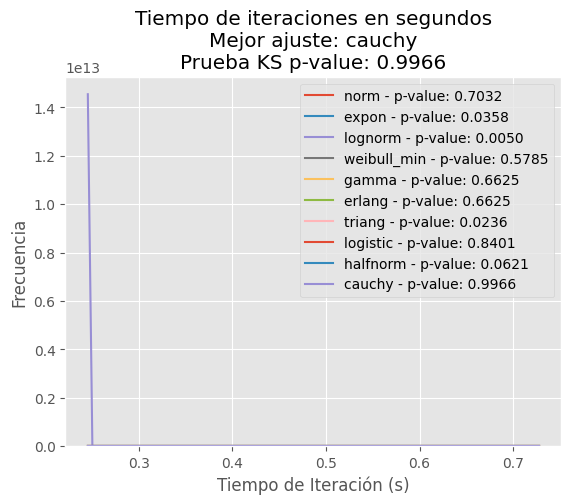

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm, expon, lognorm, weibull_min, gamma, erlang, triang, logistic, halfnorm, cauchy
from matplotlib import style

# Aplicar estilo ggplot
style.use('ggplot')

# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
file_path = 'tiempos_iteraciones.csv'
df = pd.read_csv(file_path)

# Extraer la columna de interés
tiempos_iteracion = df['TiempoIteracion']

# Definir el diccionario de descripciones de parámetros
param_descriptions = {
    'norm': 'Media y Desviación Estándar',
    'expon': 'Lambda (tasa)',
    'lognorm': 'Media logarítmica y Desviación Estándar logarítmica',
    'weibull_min': 'Parámetro de forma (c), loc, y scale',
    'gamma': 'Parámetro de forma (a), loc, y scale',
    'erlang': 'Parámetro de forma (k), loc, y scale',
    'triang': 'Valor mínimo, Valor máximo y Valor modal',
    'logistic': 'Media y Escala',
    'halfnorm': 'Media y Desviación Estándar',
    'cauchy': 'Media y Escala'
}

# Distribuciones para probar
distribuciones = {
    'norm': norm,
    'expon': expon,
    'lognorm': lognorm,
    'weibull_min': weibull_min,
    'gamma': gamma,
    'erlang': erlang,
    'triang': triang,
    'logistic': logistic,
    'halfnorm': halfnorm,
    'cauchy': cauchy
}

# Inicializar variables para el mejor ajuste
best_fit_name = None
best_fit_params = None
best_kstest_result = None
best_fit_curve = None

# Inicializar variables para almacenar información de todas las distribuciones
all_fit_results = []

# Iterar sobre las distribuciones y encontrar el mejor ajuste
for distribution_name, distribution in distribuciones.items():
    # Ajustar los datos a la distribución actual
    params = distribution.fit(tiempos_iteracion)
    
    # Realizar la prueba de ajuste de Kolmogorov-Smirnov
    kstest_result = kstest(tiempos_iteracion, distribution.cdf, params)
    
    # Almacenar información de la distribución actual
    fit_result = {
        'Distribution': distribution_name,
        'Parameters': params,
        'KS_pvalue': kstest_result.pvalue
    }
    all_fit_results.append(fit_result)
    
    # Actualizar el mejor ajuste si es necesario
    if best_fit_name is None or kstest_result.statistic < best_kstest_result.statistic:
        best_fit_name = distribution_name
        best_fit_params = params
        best_kstest_result = kstest_result
        best_fit_curve = distribution.pdf(np.linspace(min(tiempos_iteracion), max(tiempos_iteracion), 100), *params)

# Imprimir los resultados
print(f'Mejor ajuste: {best_fit_name}')
print(f'Parámetros estimados: {best_fit_params}')
print(f'Prueba KS p-value: {best_kstest_result.pvalue:.4f}')

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(all_fit_results)

# Guardar los resultados en un archivo CSV
results_df.to_csv('resultados_distribuciones_probabilidad.csv', index=False)

# Visualizar histograma de los tiempos de iteración y gráficos para cada distribución
plt.hist(tiempos_iteracion, bins=20, density=True, alpha=0.5, color='g')

for fit_result in all_fit_results:
    distribution_name = fit_result['Distribution']
    params = fit_result['Parameters']
    p_value = fit_result['KS_pvalue']
    curve = distribuciones[distribution_name].pdf(np.linspace(min(tiempos_iteracion), max(tiempos_iteracion), 100), *params)
    
    plt.plot(np.linspace(min(tiempos_iteracion), max(tiempos_iteracion), 100), curve, label=f'{distribution_name} - p-value: {p_value:.4f}')

# Configuración del gráfico
plt.title(f'Tiempo de iteraciones en segundos\nMejor ajuste: {best_fit_name}\nPrueba KS p-value: {best_kstest_result.pvalue:.4f}')
plt.xlabel('Tiempo de Iteración (s)')
plt.ylabel('Frecuencia')
plt.legend()

# Guardar la imagen en un archivo PNG
plt.savefig('histograma_tiempos_distribuciones.png')

# Mostrar el gráfico
plt.show()


C:\Users\UNIMAG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 33.6.
  warnings.warn(
C:\Users\UNIMAG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 30.4.
  warnings.warn(
C:\Users\UNIMAG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:3417: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 30.933333333333337.
  warnings.warn(
C:\Users\UNIMAG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2k

Mejor ajuste: cauchy
Parámetros estimados: (0.4616410256055319, 0.037663904299344866)
Prueba KS p-value: 0.9966


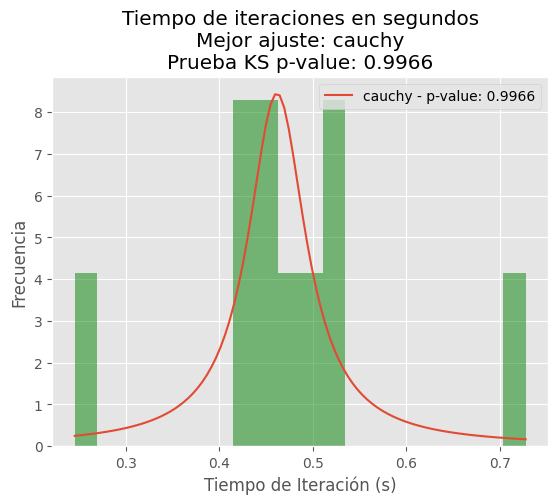

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm, expon, lognorm, weibull_min, gamma, erlang, triang, logistic, halfnorm, cauchy
from matplotlib import style

# Aplicar estilo ggplot
style.use('ggplot')

# Cargar el archivo CSV con el delimitador y el separador decimal adecuados
file_path = 'tiempos_iteraciones.csv'
df = pd.read_csv(file_path)

# Extraer la columna de interés
tiempos_iteracion = df['TiempoIteracion']

# Distribuciones para probar
distribuciones = {
    'norm': norm,
    'expon': expon,
    'lognorm': lognorm,
    'weibull_min': weibull_min,
    'gamma': gamma,
    'erlang': erlang,
    'triang': triang,
    'logistic': logistic,
    'halfnorm': halfnorm,
    'cauchy': cauchy
}

# Inicializar variables para el mejor ajuste
best_fit_name = None
best_fit_params = None
best_kstest_result = None
best_fit_curve = None

# Iterar sobre las distribuciones y encontrar el mejor ajuste
for distribution_name, distribution in distribuciones.items():
    # Ajustar los datos a la distribución actual
    params = distribution.fit(tiempos_iteracion)
    
    # Realizar la prueba de ajuste de Kolmogorov-Smirnov
    kstest_result = kstest(tiempos_iteracion, distribution.cdf, params)
    
    # Actualizar el mejor ajuste si es necesario
    if best_fit_name is None or kstest_result.pvalue > best_kstest_result.pvalue:
        best_fit_name = distribution_name
        best_fit_params = params
        best_kstest_result = kstest_result
        best_fit_curve = distribution.pdf(np.linspace(min(tiempos_iteracion), max(tiempos_iteracion), 100), *params)

# Imprimir los resultados
print(f'Mejor ajuste: {best_fit_name}')
print(f'Parámetros estimados: {best_fit_params}')
print(f'Prueba KS p-value: {best_kstest_result.pvalue:.4f}')

# Crear un DataFrame con los resultados del mejor ajuste
results_df = pd.DataFrame({
    'Distribution': [best_fit_name],
    'Parameters': [best_fit_params],
    'KS_pvalue': [best_kstest_result.pvalue]
})

# Guardar los resultados del mejor ajuste en un archivo CSV
results_df.to_csv('resultados_distribucion_mejor_ajuste.csv', index=False)

# Visualizar histograma de los tiempos de iteración y gráficos para la mejor distribución
plt.hist(tiempos_iteracion, bins=20, density=True, alpha=0.5, color='g')
plt.plot(np.linspace(min(tiempos_iteracion), max(tiempos_iteracion), 100), best_fit_curve, label=f'{best_fit_name} - p-value: {best_kstest_result.pvalue:.4f}')

# Configuración del gráfico
plt.title(f'Tiempo de iteraciones en segundos\nMejor ajuste: {best_fit_name}\nPrueba KS p-value: {best_kstest_result.pvalue:.4f}')
plt.xlabel('Tiempo de Iteración (s)')
plt.ylabel('Frecuencia')
plt.legend()

# Guardar la imagen en un archivo PNG
plt.savefig('histograma_tiempos_mejor_ajuste.png')

# Mostrar el gráfico
plt.show()
